<a href="https://colab.research.google.com/github/MoeSaleh24/School-Projects/blob/main/Analyzing_Housing_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

path = "/content/drive/MyDrive/INNFO367/M.2/redfin_2023-09-17-13-09-28.csv"
df = pd.read_csv(path)

**What is the target variable in this dataset?**

Analyzing factors that would affect house sales in Clifton, NJ.











In [ ]:
df.head()

,SALE TYPE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,DAYS ON MARKET,STATUS,URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,MLS Listing,Single Family Residential,3 Rollins Ave,Clifton,NJ,07011,519000,3,2.0,Clifton,46,Active,https://www.redfin.com/NJ/Clifton/3-Rollins-Av...,NJMLS,23023946,N,Y,40.879059,-74.156401
1,MLS Listing,Single Family Residential,12 George St,Clifton City,NJ,07011-2916,469000,3,1.0,Main Memorial,16,Active,https://www.redfin.com/NJ/Clifton/12-George-St...,GSMLS,3862559,N,Y,40.884074,-74.158431
2,MLS Listing,Townhouse,40 Devonshire Dr,Clifton,NJ,07013,449900,2,2.5,Clifton,5,Active,https://www.redfin.com/NJ/Clifton/40-Devonshir...,NJMLS,23028289,N,Y,40.873220,-74.163134
3,MLS Listing,Single Family Residential,48 Fernwood Ct,Clifton,NJ,07011,489000,3,2.0,Clifton,4,Active,https://www.redfin.com/NJ/Clifton/48-Fernwood-...,NJMLS,23028439,N,Y,40.883042,-74.155126
4,MLS Listing,Single Family Residential,16 Fairmount Ave,Clifton,NJ,07011,549999,3,2.5,Clifton,11,Active,https://www.redfin.com/NJ/Clifton/16-Fairmount...,NJMLS,23027529,N,Y,40.881456,-74.153249


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 27 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   SALE TYPE                                                                                    49 non-null     object 
 1   SOLD DATE                                                                                    0 non-null      float64
 2   PROPERTY TYPE                                                                                49 non-null     object 
 3   ADDRESS                                                                                      49 non-null     object 
 4   CITY                                                                                         49 non-null     object 
 5   STATE OR PROVINCE                     

In [ ]:
null_counts = df.isnull().sum()
print(null_counts)

SALE TYPE                                                                                       0
SOLD DATE                                                                                      49
PROPERTY TYPE                                                                                   0
ADDRESS                                                                                         0
CITY                                                                                            0
STATE OR PROVINCE                                                                               0
ZIP OR POSTAL CODE                                                                              0
PRICE                                                                                           0
BEDS                                                                                            0
BATHS                                                                                           0
LOCATION            

**Which fields have missing values and what is the proportion of missing values for each field?**
1. SOLD DATE : 49
2. SQUAREFEET: 42
3. LOtSIZE   : 11
4. YEAR BUILT: 38
5. $/SQUARE FEET: 42
6. HOA/MONTH : 46
7. NEXT OPEN HOUSE START TIME: 48
8. NEXT OPEN HOUSE END TIME: 48

In [ ]:
df.dtypes

SALE TYPE                                                                                       object
PROPERTY TYPE                                                                                   object
ADDRESS                                                                                         object
CITY                                                                                            object
STATE OR PROVINCE                                                                               object
ZIP OR POSTAL CODE                                                                              object
PRICE                                                                                            int64
BEDS                                                                                             int64
BATHS                                                                                          float64
LOCATION                                                                 

In [ ]:
def identify_categorical_variables(df):
    categorical_variables = []

    for column in df.columns:
        unique_values_count = df[column].nunique()
        if unique_values_count <= 10:
            categorical_variables.append(column)

    return categorical_variables


categorical_variables = identify_categorical_variables(df)


print("Categorical Variables:")
print(categorical_variables)

Categorical Variables:
['SALE TYPE', 'PROPERTY TYPE', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'BEDS', 'BATHS', 'LOCATION', 'SQUARE FEET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'SOURCE', 'FAVORITE', 'INTERESTED']


**Are there categorical features that are represented by numbers?**
1. SOLD DATE
2. ZIP OR POSTAL CODE
3. PRICE
4. BEDS
5. BATHS
6. SQUARE FEET
7. LOT SIZE
8. YEAR BUILT
9. DAYS ON MARKET
10. $/SQUARE FEET
11. HOA/MONTH
12. NEXT OPEN HOUSE START TIME
13. NEXT OPEN HOUSE END TIME

In [ ]:
threshold = 10

potential_categorical_columns = []
for column in df.columns:
    unique_values_count = df[column].nunique()
    if unique_values_count <= 10:
        potential_categorical_columns.append(column)

        for column in potential_categorical_columns:
          unique_values = df[column].unique()
    print(f"Column '{column}' has unique values: {unique_values}")

Column 'SALE TYPE' has unique values: ['MLS Listing' 'For-Sale-by-Owner Listing']
Column 'SOLD DATE' has unique values: [nan]
Column 'PROPERTY TYPE' has unique values: ['Single Family Residential' 'Townhouse' 'Multi-Family (2-4 Unit)'
 'Condo/Co-op']
Column 'ADDRESS' has unique values: ['Single Family Residential' 'Townhouse' 'Multi-Family (2-4 Unit)'
 'Condo/Co-op']
Column 'CITY' has unique values: ['Clifton' 'Clifton City']
Column 'STATE OR PROVINCE' has unique values: ['NJ']
Column 'ZIP OR POSTAL CODE' has unique values: ['07011' '07011-2916' '07013' '07011-2936' '07011-2414' '07013-1385'
 '07011-1213' '07011-2347' '07011-2016']
Column 'PRICE' has unique values: ['07011' '07011-2916' '07013' '07011-2936' '07011-2414' '07013-1385'
 '07011-1213' '07011-2347' '07011-2016']
Column 'BEDS' has unique values: [3 2 6 5 4 0 1 8]
Column 'BATHS' has unique values: [2.  1.  2.5 4.  1.5 3.5 3. ]
Column 'LOCATION' has unique values: ['Clifton' 'Main Memorial' 'Clifton City' 'Clifton Center' 'Lake

**Which (multinomial) fields would need to be dummy coded for modeling?**
1. SALE TYPE
2. PROPERTY TYPE
3. ADDRESS
4. LOCATION
5. STATUS
6. SOURCE
7. MLS

In [ ]:
df.describe()

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE
count,49.000000,49.000000,49.000000,7.000000,38.000000,11.000000,49.000000,7.000000,3.000000,49.000000,49.000000
mean,542305.591837,3.530612,2.265306,1914.857143,4495.315789,1945.818182,47.857143,270.714286,447.000000,40.876361,-74.154621
std,143880.235420,1.542482,0.823496,255.089153,1613.348526,31.552554,56.032357,37.888935,165.782991,0.007629,0.020118
min,158000.000000,0.000000,1.000000,1562.000000,1454.000000,1908.000000,1.000000,225.000000,269.000000,40.863268,-74.192840
25%,459000.000000,3.000000,1.500000,1765.000000,3333.500000,1920.500000,9.000000,248.500000,372.000000,40.870242,-74.169892
50%,519000.000000,3.000000,2.000000,1976.000000,4087.500000,1931.000000,31.000000,269.000000,475.000000,40.874873,-74.153304
75%,629000.000000,4.000000,2.500000,2081.000000,5508.250000,1974.500000,73.000000,287.000000,536.000000,40.881456,-74.137277
max,900000.000000,8.000000,4.000000,2174.000000,8851.000000,1988.000000,319.000000,330.000000,597.000000,40.895780,-74.125663


<ipython-input-226-4e2ad23bf4f5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


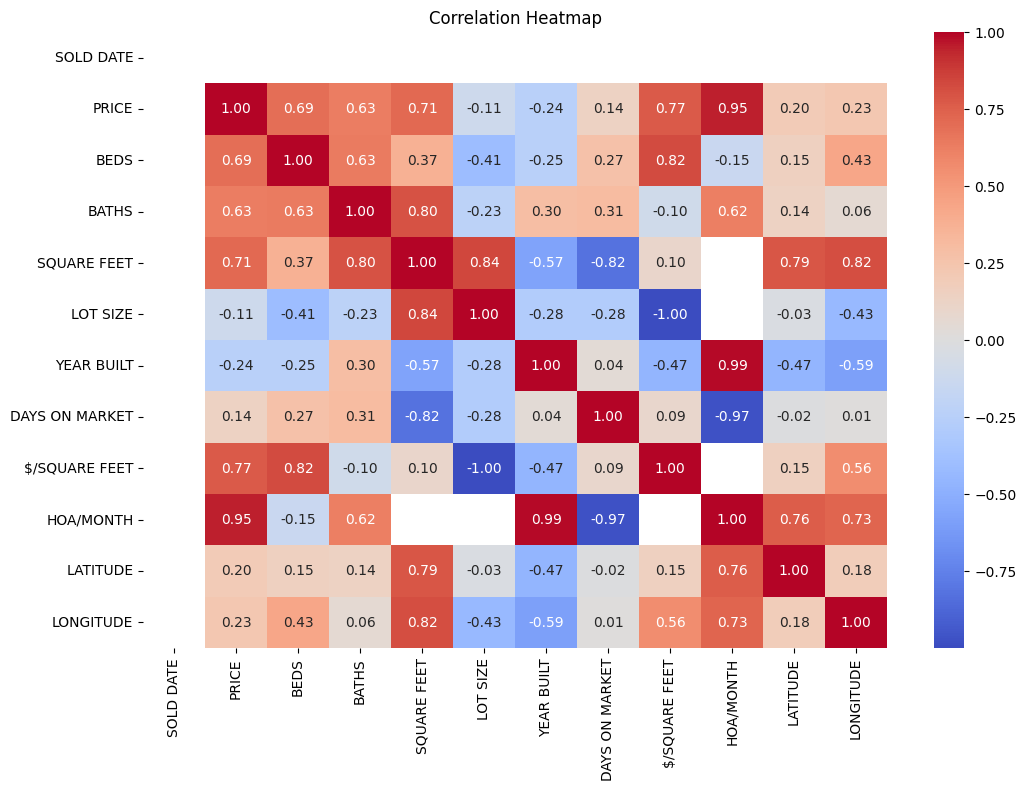

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")

plt.show()

In [ ]:
df = df.dropna(axis=1)

#MUST BE RAN BEFORE VIF_DATA

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
numeric_df = df.select_dtypes(include=['number'])

vif_data = pd.DataFrame()
vif_data["Variable"] = numeric_df.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]

print(vif_data)

         Variable           VIF
0           PRICE  3.399923e+01
1            BEDS  1.640819e+01
2           BATHS  1.801598e+01
3  DAYS ON MARKET  1.997100e+00
4        LATITUDE  1.019077e+07
5       LONGITUDE  1.018514e+07


 **Is there evidence of multicollinearity (correlation among features)?**

1. PRICE: 33.99923
2. BEDS: 16.40819
3. BATHS: 18.01598
4. DAYS ON MARKET: 1.99710
5. LATITUDE: 10,190,770
6. LONGITUDE: 10,185,140

multicollinearity is indicated when VIF values are significantly above 1, and it's a concern for PRICE, BEDS, and BATHS in the dataset.

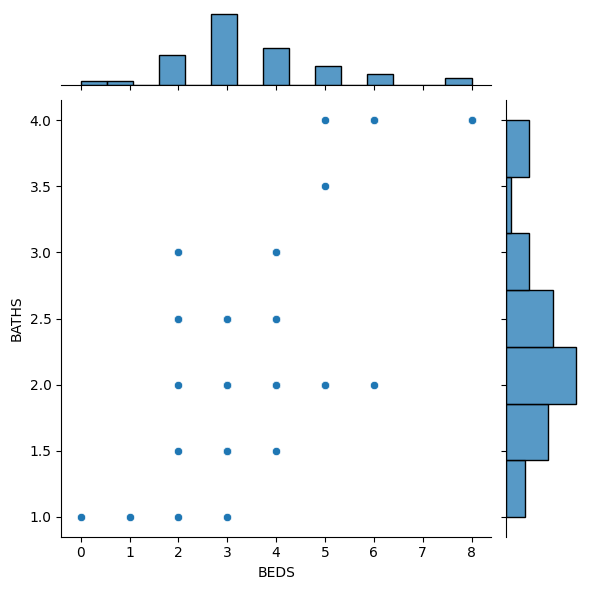

In [ ]:
sns.jointplot(x='BEDS', y='BATHS', data=df, kind='scatter')